# OvR 和 OvO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,:2] # 只取前2个特征
y = iris.target

In [2]:
from sklearn.model_selection._split import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

In [3]:
from sklearn.linear_model.logistic import LogisticRegression

# sk-learn中的LogisticRegression已经可以支持多分类任务
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 从参数可知，默认使用OvR  ：multi_class='ovr'

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
log_reg.score(X_train, y_train),log_reg.score(X_test, y_test)

(0.7232142857142857, 0.65789473684210531)

In [5]:
from c6_logistic_regression.plot_utils import plot_decision_boundary

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


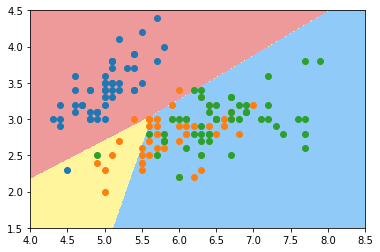

In [6]:
# 画出决策边界
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

默认是使用OvR，那么改为使用OvO试试

In [7]:
# 使用OvO方式
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [8]:
log_reg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
log_reg2.score(X_train, y_train), log_reg2.score(X_test, y_test)

(0.8214285714285714, 0.78947368421052633)

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


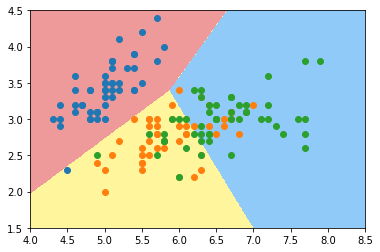

In [10]:
# 画出决策边界
plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

可见使用OvO比使用OvR要更准确

## 使用所有数据及特征

In [11]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)


In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.94736842105263153

In [20]:
# 使用OvO
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

1.0

## sklearn封装了专门的OvO，OvR类来提供给2分类算法

In [21]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

# 直接把2分类器传进去
ovr = OneVsRestClassifier(log_reg)
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

0.94736842105263153

In [22]:
ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

1.0